Chase Perry

Dr. Mihail

CS 4731

Assignment 1

Comments: Spoke with Johnnie Oldfield about how to generate the linear systems for Problem 2 and 3 without hardcoding it. He suggested the np.power() function, so credit to him for finding that.

#1. Problem 1
Write one script that solves all the linear systems below, in order.

##1 
\begin{cases} 5x_1 - 3x_2 + 2x_3 = 3 \\ 2x_1 + 4x_2 - x_3 = 7 \\ x_1 - 11x_2 + 4x_3 = 3 \end{cases}

##2 
\begin{cases} x_1 + 4x_3 = 13 \\ 4x_1 - 2x_2 + x_3 = 7 \\ 2x_1 - 2x_2 - 7x_3 = -19 \end{cases}

##3 
\begin{cases} −2x_1 + x_2 = −3 \\ x1 + x2 = 3 \end{cases}

##4 
\begin{cases} 10x_1 − 7x_2 = 7 \\ −3x_1 + 2x_2 − 6x_3 = 4 \\ 5x1 + x2 + 5x3 = −19 \end{cases}

##5 
\begin{cases} x_1 + 4x_2 − x_3 + x_4 = 2 \\ 2x_1 + 7x_2 + x_3 − 2x_4 = 16 \\ x_1 + 4x_2 − x_3 + 2x_4 = −15 \\ 3x_1 − 10x_2 − 2x_3 + 5x_4 = −15 \end{cases}

In [10]:
#problem 1, linear system 1
import numpy as np

def solve(x, b):
  
  print('Attempting to solve the linear system (A): ')
  print(x)
  print('With the solution matrix (b) being: ')
  print(b)
  try:
    inv = np.linalg.inv(x)
    
    print('The solution (x) to the linear system is ') 
    print(np.matmul(inv, b))
  except np.linalg.LinAlgError:
    print('The matrix that was entered is not invertible. This means that the linear system has no singular solution.')


sys1 = np.array([[5, -3, 2],
                [2, 4, -1],
                [1, -11, 4]])

b1 = np.array([[3],
              [7],
              [3]])

solve(sys1, b1)




Attempting to solve the linear system (A): 
[[  5  -3   2]
 [  2   4  -1]
 [  1 -11   4]]
With the solution matrix (b) being: 
[[3]
 [7]
 [3]]
The matrix that was entered is not invertible. This means that the linear system has no singular solution.


In [8]:
#problem 1, linear system 2

sys2 = np.array([[1, 0, 4],
                [4, -2, 1],
                [2, -2, -7]])

b2 = np.array([[13],
              [7],
              [-19]])

solve(sys2, b2)

Attempting to solve the linear system (A): 
[[ 1  0  4]
 [ 4 -2  1]
 [ 2 -2 -7]]
With the solution matrix (b) being: 
[[ 13]
 [  7]
 [-19]]
The matrix that was entered is not invertible. This means that the linear system has no singular solution.


In [11]:
#problem 1, linear system 3

sys3 = np.array([[-2, 1],
                [1, 1]])

b3 = np.array([[-3], 
               [3]])

solve(sys3, b3)

Attempting to solve the linear system (A): 
[[-2  1]
 [ 1  1]]
With the solution matrix (b) being: 
[[-3]
 [ 3]]
The solution (x) to the linear system is 
[[2.]
 [1.]]


In [12]:
#problem 1, linear system 4

sys4 = np.array([[10, -7, 0],
                [-3, 2, -6],
                [5, 1, 5]])

b4 = np.array([[7], 
               [4], 
               [-19]])

solve(sys4, b4)

Attempting to solve the linear system (A): 
[[10 -7  0]
 [-3  2 -6]
 [ 5  1  5]]
With the solution matrix (b) being: 
[[  7]
 [  4]
 [-19]]
The solution (x) to the linear system is 
[[-2.06037736]
 [-3.94339623]
 [-0.9509434 ]]


In [13]:
#problem 1, linear system 5

sys5 = np.array([[1, 4, -1, 1], 
                [2, 7, 1, -2],
                [1, 4, -1, 2],
                [3, -10, -2, 5]])

b5 = np.array([[2],
              [16],
              [-15],
              [-15]])

solve(sys5, b5)

Attempting to solve the linear system (A): 
[[  1   4  -1   1]
 [  2   7   1  -2]
 [  1   4  -1   2]
 [  3 -10  -2   5]]
With the solution matrix (b) being: 
[[  2]
 [ 16]
 [-15]
 [-15]]
The solution (x) to the linear system is 
[[  5.69230769]
 [ -1.46153846]
 [-19.15384615]
 [-17.        ]]


#2. Problem 2 - curve fitting

  x  | f(x)
------------
-0.5 | 7.625

-0.2 | 9.3632

0.5  | 9.625

0.75 | 8.7578


In [0]:
points = np.array([[-0.5, 7.625],
                  [-0.2, 9.3632],
                  [0.5, 9.625],
                  [0.75, 8.7578],
                  [1, 8]])

solve2= lambda x, b: np.matmul(np.linalg.inv(x), b)

def get_system(x):
  A = np.power(x[:, 0][np.newaxis].T, [0, 1, 2, 3, 4])
  b = x[:,1][np.newaxis].T
  return A, b

sys6, b6 = get_system(points)

solution = solve2(sys6, b6)


Text(0.5, 1.0, '2. Problem 2 - curve fitting (4th degree polynomial)')

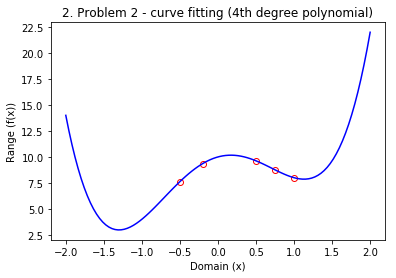

In [15]:
import matplotlib.pyplot as plt

domain = np.linspace(-2, 2, 100)
f1 = lambda x, sol: sol[0,0] + sol[1,0]*x + sol[2,0]*(x**2) + sol[3,0]*(x**3) + sol[4,0]*(x**4)
val_f1 = f1(domain, solution)

fig, ax = plt.subplots(1, 1)
ax.plot(points[:, 0], points[:, 1], 'ro', fillstyle='none')
ax.plot(domain, val_f1, '-b')
ax.set_xlabel('Domain (x)')
ax.set_ylabel('Range (f(x))')
ax.set_title('2. Problem 2 - curve fitting (4th degree polynomial)')

#3 Problem 3 - curve fitting

Text(0.5, 1.0, 'Noisy samples and ground truth function')

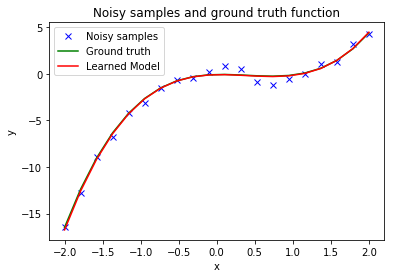

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#this defines the family of cubics
f = lambda w, x: w[0] + w[1]*x + w[2]*(x**2) + w[3]*(x**3)

#sample 20 equally spaced values between -2 and 2
dom = np.linspace(-2, 2, 20)

#generate noisy data points as values of a particular cubic + noise
w = np.random.randn(4)
val = f(w,dom) + np.random.randn(20)/2

#generate ground truth samples for visualization only
val_truth = f(w, dom)


#My Solution#########################################################
get_prob3 = lambda x: np.power(x[np.newaxis].T, [0, 1, 2, 3])
prob3_sys = get_prob3(dom)
prob3_weights = np.linalg.lstsq(prob3_sys, val, rcond=None)
prob3_sol = f(prob3_weights[0], dom)
#####################################################################

#plot
fig, ax = plt.subplots(1, 1)
ax.plot(dom, val, 'bx')
ax.plot(dom, val_truth, '-g')
ax.plot(dom, prob3_sol, '-r') #######################################
ax.legend(('Noisy samples', 'Ground truth', 'Learned Model'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Noisy samples and ground truth function')